# Demonstration of Straight-line fit

**Name: Dahye Kim (김다혜)**  
**ID: 20153712**  
**Date: 8 November 2018**  
**Project Github:** https://github.com/joyfuldahye/MFCVML_Assignments/tree/master/Assignment06  

**Requirements** 

* Find a line that fits the given data
* The approximating line is obtained by the least square approximate solution


**Essential Visualisation: Line Fitting**

* Plot the noisy data
* Plot the clean data
* Plot the line that fits the noisy data by the least squre error

-----------------------------------------------------------------------

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Assign noisy and clean outcome data

In [2]:
num     = 201
std     = 20
a       = 2 
b       = 10

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-100,100,num)
y1      = a * x + nn * std + b 
y2      = a * x + b

### Plot the outcome data

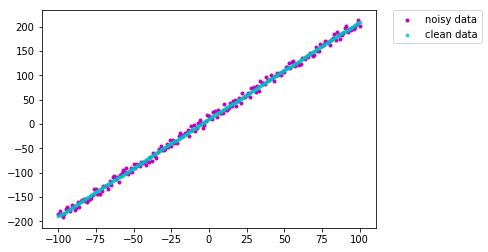

In [3]:
plt.figure(1)
plt.scatter(x, y1, c = 'm', alpha=1, marker = '.', label = "noisy data")
plt.scatter(x, y2, c = 'c', alpha=.7, marker = '.', label = "clean data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# x  : x-coordinate data
# y1 : (noisy) y-coordinate data
# y2 : (clean) y-coordinate data 
# y = f(x) = a * x + b

### Define the least squares fit: 

* $\hat{f}(x) = avg(y^d) + \rho\frac{std(y^d)}{std(x^d)}(x - avg(x^d))$
  * $std(x^d)=\frac{\|x^d-avg(x^d)\mathbf{1}\|}{\sqrt{N}}$  
  * $\rho = \frac{(x^d-avg(x^d)\mathbf{1})^T(y^d-avg(y^d)\mathbf{1})}{Nstd(x^d)std(y^d)}$

#### compute the standard deviation of $x$: 
* $std(x^d)=\frac{\|x^d-avg(x^d)\mathbf{1}\|}{\sqrt{N}}$

In [4]:
mean_x = np.mean(x)
demean_x = x - mean_x
norm_x = np.linalg.norm(demean_x)
std_x = norm_x / np.sqrt(num)
transposed_demean_x = np.transpose(demean_x)

#### compute the standard deviation of noisy data $y_1$:
* $std(y^d)=\frac{\|y^d-avg(y^d)\mathbf{1}\|}{\sqrt{N}}$

In [5]:
mean_y1 = np.mean(y1)
demean_y1 = y1 - mean_y1
norm_y1 = np.linalg.norm(demean_y1)
std_y1 = norm_y1 / np.sqrt(num)

#### compute the correlation coefficient ($\rho$) of $x$ and $y_1$: 
* $\rho = \frac{(x^d-avg(x^d)\mathbf{1})^T(y^d-avg(y^d)\mathbf{1})}{Nstd(x^d)std(y^d)}$


In [6]:
rho_xy = transposed_demean_x.dot(demean_y1) / (num*std_x*std_y1)
# print(std_x, std_y1)
# print(transposed_demean_x)
# print(transposed_demean_x.dot(demean_y1))
# print(rho)

#### compute the least squares fit
* $\hat{f}(x) = avg(y^d) + \rho\frac{std(y^d)}{std(x^d)}(x - avg(x^d))$

In [7]:
y = mean_y1 + rho_xy*(std_y1 / std_x)*demean_x

## Plot the approximating line and data

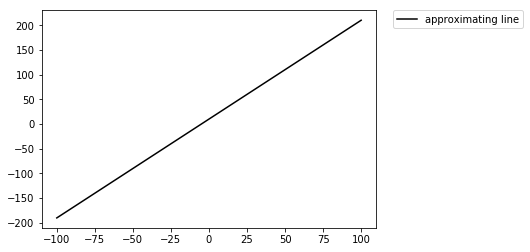

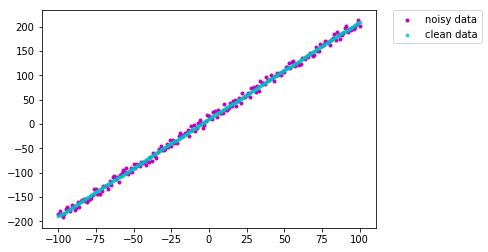

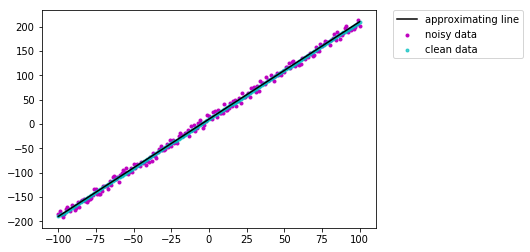

In [8]:
# plot the approximating line alone
plt.figure(1)
plt.plot(x, y, 'k-', label = "approximating line")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# plot the outcome data
plt.figure(2)
plt.scatter(x, y1, c = 'm', alpha=1, marker = '.', label = "noisy data")
plt.scatter(x, y2, c = 'c', alpha=.7, marker = '.', label = "clean data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# plot the approximating line and outcome data together
plt.figure(3)
plt.scatter(x, y1, c = 'm', alpha=1, marker = '.', label = "noisy data")
plt.scatter(x, y2, c = 'c', alpha=.7, marker = '.', label = "clean data")
plt.plot(x, y, 'k-', label = "approximating line")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

> The shape of the approximating line which fits the least square error of noisy data is almost exactly overlapped the tendency of clean data.